### Simple UMAP example
This notebook shows you how to run a UMAP projection on the MNIST dataset, as well as plot the loss, and save the model.

### load data

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, Y_train), (test_images, Y_test) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], -1))/255.
test_images = test_images.reshape((test_images.shape[0], -1))/255.

### create parametric umap model

In [2]:
from umap.parametric_umap import ParametricUMAP

In [3]:
embedder = ParametricUMAP(verbose=True)

In [4]:
embedding = embedder.fit_transform(train_images)

ParametricUMAP(optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f8ffc2894a8>)
Construct fuzzy simplicial set
Tue Sep  1 15:49:42 2020 Finding Nearest Neighbors
Tue Sep  1 15:49:42 2020 Building RP forest with 17 trees
Tue Sep  1 15:49:44 2020 parallel NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
Tue Sep  1 15:49:55 2020 Finished Nearest Neighbor Search
Tue Sep  1 15:49:58 2020 Construct embedding
Epoch 1/10
725/725 [==============================] - 13s 18ms/step - loss: 0.2327
Epoch 2/10
725/725 [==============================] - 14s 19ms/step - loss: 0.1780
Epoch 3/10
725/725 [==============================] - 14s 19ms/step - loss: 0.1616
Epoch 4/10
725/725 [==============================] - 15s 20ms/step - loss: 0.1516
Epoch 5/10
725/725 [==============================] - 15s 20ms/step - loss: 0.1447
Epoch 6/10
725/725 [==============================] - 14s 20ms/step - loss: 0.1396
Epoch 7/10
725/725 [=====================

### plot results

In [5]:
import matplotlib.pyplot as plt

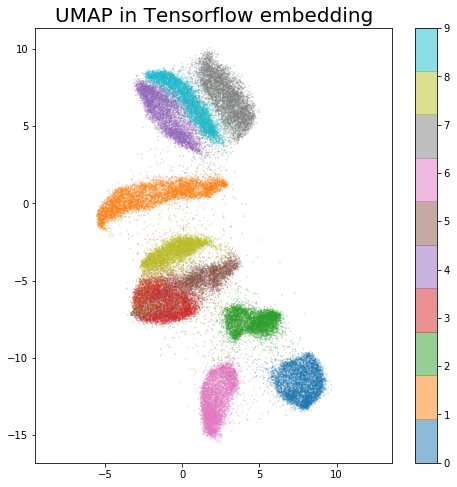

In [6]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=Y_train.astype(int),
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("UMAP in Tensorflow embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### plotting loss

In [7]:
embedder._history.keys()

dict_keys(['loss'])

Text(0.5, 0, 'Epoch')

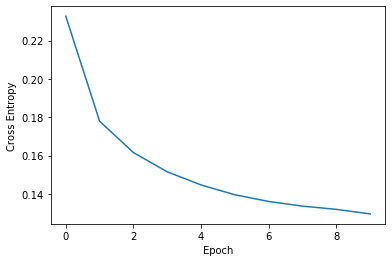

In [8]:
fig, ax = plt.subplots()
ax.plot(embedder._history['loss'])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')

### saving and loading

In [9]:
from umap.parametric_umap import load_ParametricUMAP

In [10]:
embedder.save('/tmp/model')

Keras encoder model saved to /tmp/model/encoder
Keras full model saved to /tmp/model/parametric_model
Pickle of ParametricUMAP model saved to /tmp/model/model.pkl


In [11]:
embedder = load_ParametricUMAP('/tmp/model')

Pickle of ParametricUMAP model loaded from /tmp/model/model.pkl


W0901 15:52:58.916728 140256498362176 load.py:134] No training configuration found in save file, so the model was *not* compiled. Compile it manually.


Keras encoder model loaded from /tmp/model/encoder
Keras full model loaded from /tmp/model/parametric_model
